In [104]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report



In [105]:
# Reading the CSV file
df = pd.read_csv('booking10.csv')

# Printing top 5 rows
df

,Unnamed: 0,Name,review
0,0,Olga Romanova,I've used the app for years and was a loyal cu...
1,1,Jo Mosley,"Booking knows how to keep the reservation, not..."
2,2,Brian Perry,The app charges you cancellation fees even whe...
3,3,Olga Romanova,I've used the app for years and was a loyal cu...
4,4,Jo Mosley,"Booking knows how to keep the reservation, not..."
...,...,...,...
4038,4038,Beth Elkins,It took forever to change your reservation tha...
4039,4039,Mel Mor,"The lowest prices on hotel/motel rooms, in my ..."
4040,4040,A Google user,"There's a little bug, when you see your review..."
4041,4041,A Google user,Good and useful app. The only downside is the ...


In [106]:
print("shape of dataset",df.shape)

shape of dataset (4043, 3)


In [107]:
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,Name,review
0,Olga Romanova,I've used the app for years and was a loyal cu...
1,Jo Mosley,"Booking knows how to keep the reservation, not..."
2,Brian Perry,The app charges you cancellation fees even whe...
3,Olga Romanova,I've used the app for years and was a loyal cu...
4,Jo Mosley,"Booking knows how to keep the reservation, not..."


In [108]:
!pip install textstat

In [109]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
import textstat
from textstat import flesch_reading_ease

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saltu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\saltu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saltu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [110]:
sid = SentimentIntensityAnalyzer()

In [111]:
positive_scores = []
negative_scores = []
neutral_scores = []
compound_scores = []

for index, row in df.iterrows():
    review= row['review']
    sentiment_scores = sid.polarity_scores(review)
    
    pos_scores =sentiment_scores['pos']
    neg_scores =sentiment_scores['neg']
    neu_scores = sentiment_scores['neu']
    comp_scores= sentiment_scores['compound']
    
    positive_scores.append(pos_scores*100)
    negative_scores.append(neg_scores* 100)
    neutral_scores.append(neu_scores * 100)
    compound_scores.append(comp_scores *100)
# #print(positive_scores)
# sentiment_scores

In [112]:
df ['POSITIVE SCORE'] = positive_scores
df ['NEGATIVE SCORE'] = negative_scores
df ['NEUTRAL SCORE'] = neutral_scores
df ['COMPOUND SCORE'] = compound_scores
df

,Name,review,POSITIVE SCORE,NEGATIVE SCORE,NEUTRAL SCORE,COMPOUND SCORE
0,Olga Romanova,I've used the app for years and was a loyal cu...,9.5,2.0,88.5,79.06
1,Jo Mosley,"Booking knows how to keep the reservation, not...",17.2,5.3,77.5,92.30
2,Brian Perry,The app charges you cancellation fees even whe...,0.0,18.2,81.8,-92.18
3,Olga Romanova,I've used the app for years and was a loyal cu...,9.5,2.0,88.5,79.06
4,Jo Mosley,"Booking knows how to keep the reservation, not...",17.2,5.3,77.5,92.30
...,...,...,...,...,...,...
4038,Beth Elkins,It took forever to change your reservation tha...,4.7,15.7,79.5,-70.03
4039,Mel Mor,"The lowest prices on hotel/motel rooms, in my ...",8.7,7.1,84.3,15.11
4040,A Google user,"There's a little bug, when you see your review...",17.6,0.0,82.4,80.47
4041,A Google user,Good and useful app. The only downside is the ...,22.2,4.3,73.4,80.70


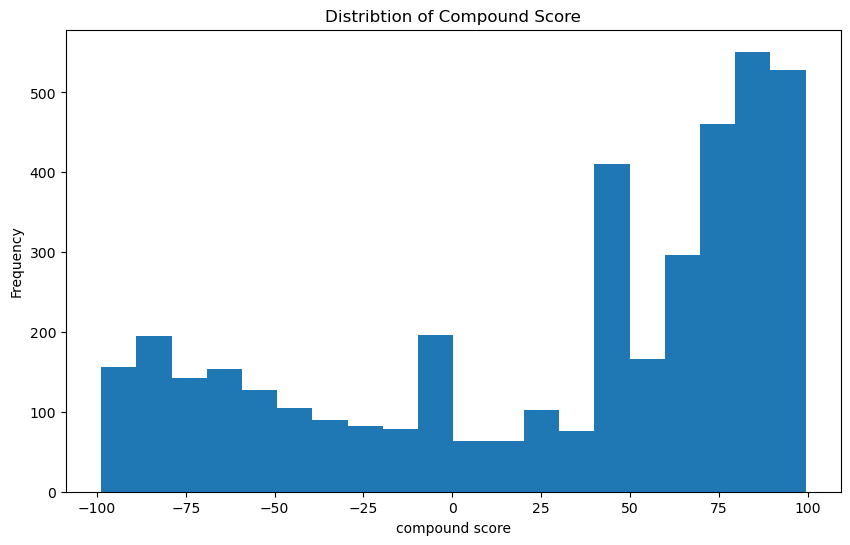

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df['COMPOUND SCORE'],bins=20)
plt.xlabel('compound score')
plt.ylabel('Frequency')
plt.title('Distribtion of Compound Score')
plt.show()

In [124]:
positive_threshold = 0.2
negative_threshold = 0.2

df['Sentiment']=''
for index, row in df.iterrows():
    compound_score = row['COMPOUND SCORE']
    if compound_score > positive_threshold:
        df.at[index,'Sentiment']= 'positive'
    elif compound_score < negative_threshold:
             df.at[index,'Sentiment']= 'negative'
    else:  
            df.at[index,'Sentiment']= 'neutral'
                 

In [125]:
df

,Name,review,POSITIVE SCORE,NEGATIVE SCORE,NEUTRAL SCORE,COMPOUND SCORE,Sentiment
0,Olga Romanova,I've used the app for years and was a loyal cu...,9.5,2.0,88.5,79.06,positive
1,Jo Mosley,"Booking knows how to keep the reservation, not...",17.2,5.3,77.5,92.30,positive
2,Brian Perry,The app charges you cancellation fees even whe...,0.0,18.2,81.8,-92.18,negative
3,Olga Romanova,I've used the app for years and was a loyal cu...,9.5,2.0,88.5,79.06,positive
4,Jo Mosley,"Booking knows how to keep the reservation, not...",17.2,5.3,77.5,92.30,positive
...,...,...,...,...,...,...,...
4038,Beth Elkins,It took forever to change your reservation tha...,4.7,15.7,79.5,-70.03,negative
4039,Mel Mor,"The lowest prices on hotel/motel rooms, in my ...",8.7,7.1,84.3,15.11,positive
4040,A Google user,"There's a little bug, when you see your review...",17.6,0.0,82.4,80.47,positive
4041,A Google user,Good and useful app. The only downside is the ...,22.2,4.3,73.4,80.70,positive


In [126]:
df['Sentiment'].value_counts()


positive    2717
negative    1326
Name: Sentiment, dtype: int64

In [129]:
df.to_csv("booking10_update.csv",index=False)